For this project, we are given data on Terry Stop arrest records. A concrete goal of the analysis of this dataset will be to determine if we can predict if the individual was arrested based on the listed features, however it should be noted that there is likely a distinct bias based on the suspect's perceived Race. Further analysis will be conducted to see how Race could affect the final outcome.


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('Terry_Stops.csv')

data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20180000001357,408984,Field Contact,None,8563,1993,M,White,...,01:34:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
1,46 - 55,-1,20180000001408,412310,Field Contact,None,8571,1995,F,White,...,22:28:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
2,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,01:06:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42566 entries, 0 to 42565
Data columns (total 23 columns):
Subject Age Group           42566 non-null object
Subject ID                  42566 non-null int64
GO / SC Num                 42566 non-null int64
Terry Stop ID               42566 non-null int64
Stop Resolution             42566 non-null object
Weapon Type                 42566 non-null object
Officer ID                  42566 non-null object
Officer YOB                 42566 non-null int64
Officer Gender              42566 non-null object
Officer Race                42566 non-null object
Subject Perceived Race      42566 non-null object
Subject Perceived Gender    42566 non-null object
Reported Date               42566 non-null object
Reported Time               42566 non-null object
Initial Call Type           42566 non-null object
Final Call Type             42566 non-null object
Call Type                   42566 non-null object
Officer Squad               42023 non-null ob

In [3]:
data['Subject Age Group'].value_counts(normalize=True)

26 - 35         0.331979
36 - 45         0.209345
18 - 25         0.204576
46 - 55         0.128788
56 and Above    0.049476
1 - 17          0.044590
-               0.031246
Name: Subject Age Group, dtype: float64

In [4]:
print(data['Subject ID'].value_counts(normalize=True))

-1              0.814147
 7726859935     0.000376
 7753260438     0.000258
 7727117712     0.000235
 7727827572     0.000188
                  ...   
 13012773265    0.000023
 8300376482     0.000023
 7732894151     0.000023
 7734813128     0.000023
 11716939786    0.000023
Name: Subject ID, Length: 6414, dtype: float64


In [5]:
print(data['GO / SC Num'].value_counts(normalize=True))

20160000378750    0.000376
20150000190790    0.000376
20180000134604    0.000329
20170000132836    0.000305
20190000441736    0.000305
                    ...   
20190000187444    0.000023
20170000461131    0.000023
20170000001974    0.000023
20190000048136    0.000023
20180000071981    0.000023
Name: GO / SC Num, Length: 33094, dtype: float64


In [7]:
data['Stop Resolution'].value_counts(normalize=True)*100

Field Contact               39.425833
Offense Report              34.313772
Arrest                      24.162477
Referred for Prosecution     1.710285
Citation / Infraction        0.387633
Name: Stop Resolution, dtype: float64

In [8]:
data['Weapon Type'].value_counts(normalize=True)

None                                 0.765047
-                                    0.178288
Lethal Cutting Instrument            0.034817
Knife/Cutting/Stabbing Instrument    0.008763
Handgun                              0.006273
Firearm Other                        0.002349
Club, Blackjack, Brass Knuckles      0.001151
Blunt Object/Striking Implement      0.001057
Firearm                              0.000493
Mace/Pepper Spray                    0.000376
Firearm (unk type)                   0.000352
Other Firearm                        0.000305
Club                                 0.000211
Rifle                                0.000141
Taser/Stun Gun                       0.000094
None/Not Applicable                  0.000094
Shotgun                              0.000070
Automatic Handgun                    0.000047
Brass Knuckles                       0.000023
Fire/Incendiary Device               0.000023
Blackjack                            0.000023
Name: Weapon Type, dtype: float64

In [9]:
print('Number of arresting officers ',data['Officer ID'].nunique())

for i in range(1,11):
    print(f'Officers with stops fewer than {i*10}: ',(data['Officer ID'].value_counts()<i*10).sum())

Number of arresting officers  1146
Officers with stops fewer than 10:  325
Officers with stops fewer than 20:  522
Officers with stops fewer than 30:  666
Officers with stops fewer than 40:  769
Officers with stops fewer than 50:  855
Officers with stops fewer than 60:  922
Officers with stops fewer than 70:  974
Officers with stops fewer than 80:  1013
Officers with stops fewer than 90:  1044
Officers with stops fewer than 100:  1058


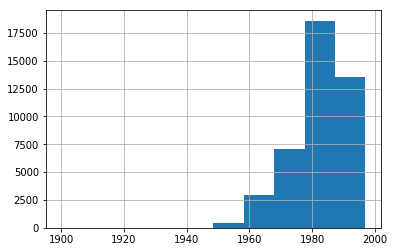

In [10]:
data['Officer YOB'].value_counts(normalize=True)

data['Officer YOB'].hist()

In [11]:
print(data['Officer YOB'].describe())

count    42566.00000
mean      1982.53242
std          8.89790
min       1900.00000
25%       1978.00000
50%       1985.00000
75%       1989.00000
max       1997.00000
Name: Officer YOB, dtype: float64


In [12]:
data['Officer Gender'].value_counts(normalize=True)

M    0.887328
F    0.112414
N    0.000258
Name: Officer Gender, dtype: float64

In [13]:
data['Officer Race'].value_counts(normalize=True)

White                            0.773834
Hispanic or Latino               0.055114
Two or More Races                0.053094
Black or African American        0.040126
Asian                            0.038434
Not Specified                    0.021825
Nat Hawaiian/Oth Pac Islander    0.010008
American Indian/Alaska Native    0.007259
Unknown                          0.000305
Name: Officer Race, dtype: float64

In [14]:
data['Subject Perceived Gender'].value_counts(normalize=True)

Male                                                         0.780834
Female                                                       0.205187
Unable to Determine                                          0.007659
-                                                            0.006014
Unknown                                                      0.000258
Gender Diverse (gender non-conforming and/or transgender)    0.000047
Name: Subject Perceived Gender, dtype: float64

In [15]:
data['Subject Perceived Race'].value_counts(normalize=True)

White                                        0.490250
Black or African American                    0.297843
Unknown                                      0.051027
Hispanic                                     0.039562
-                                            0.037166
Asian                                        0.031316
American Indian or Alaska Native             0.029507
Multi-Racial                                 0.019006
Other                                        0.003571
Native Hawaiian or Other Pacific Islander    0.000752
Name: Subject Perceived Race, dtype: float64

In [16]:
data['Reported Time'].value_counts(normalize=True)*100

19:18:00    0.119814
03:13:00    0.117465
17:00:00    0.117465
03:09:00    0.117465
02:56:00    0.117465
              ...   
07:41:23    0.002349
02:07:18    0.002349
19:41:29    0.002349
00:26:05    0.002349
16:50:37    0.002349
Name: Reported Time, Length: 8953, dtype: float64

In [18]:
data['Reported Date'].value_counts(normalize=True)

2015-10-01T00:00:00    0.002373
2015-09-29T00:00:00    0.001551
2015-05-28T00:00:00    0.001339
2015-07-18T00:00:00    0.001292
2019-04-26T00:00:00    0.001269
                         ...   
2020-05-25T00:00:00    0.000023
2015-05-06T00:00:00    0.000023
2015-03-31T00:00:00    0.000023
2015-04-28T00:00:00    0.000023
2015-05-10T00:00:00    0.000023
Name: Reported Date, Length: 1898, dtype: float64

In [65]:
print(data['Initial Call Type'].value_counts(normalize=True))
print(data['Initial Call Type'].unique())
print(data['Initial Call Type'].nunique())


-                                                 0.300756
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.064840
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.061927
DISTURBANCE, MISCELLANEOUS/OTHER                  0.051661
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.041535
                                                    ...   
INJURED -  PERSON/INDUSTRIAL ACCIDENT             0.000023
MISSING - ADULT                                   0.000023
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS     0.000023
ANIMAL, REPORT - BITE                             0.000023
UNKNOWN - ANI/ALI - PAY PHNS (INCL OPEN LINE)     0.000023
Name: Initial Call Type, Length: 161, dtype: float64
['-' 'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW'
 'SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT'
 'DIST - IP/JO - DV DIST - NO ASLT'
 'NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)'
 'MVC - HIT AND RUN (NON INJURY), INCLUDES IP/JO'
 'THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)'
 'SUSPICIOUS PERSON,

In [67]:
data=data[data['Initial Call Type'] != '-']
print(data['Initial Call Type'].value_counts(normalize=True))     

SUSPICIOUS STOP - OFFICER INITIATED ONVIEW        0.092729
SUSPICIOUS PERSON, VEHICLE OR INCIDENT            0.088563
DISTURBANCE, MISCELLANEOUS/OTHER                  0.073881
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)    0.059401
TRESPASS                                          0.056377
                                                    ...   
ANIMAL, REPORT - BITE                             0.000034
KNOWN KIDNAPPNG                                   0.000034
-ASSIGNED DUTY - STAKEOUT                         0.000034
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS     0.000034
MISSING - (ALZHEIMER, ENDANGERED, ELDERLY)        0.000034
Name: Initial Call Type, Length: 160, dtype: float64


In [68]:
ICTs=data['Initial Call Type'].value_counts(normalize=True)
Rare_ICT=ICTs[ICTs<.01].index

data['Initial Call Type'].replace(Rare_ICT,'other',inplace=True)
print(data['Initial Call Type'].value_counts(normalize=True))

other                                               0.211632
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW          0.092729
SUSPICIOUS PERSON, VEHICLE OR INCIDENT              0.088563
DISTURBANCE, MISCELLANEOUS/OTHER                    0.073881
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)      0.059401
TRESPASS                                            0.056377
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)           0.042333
SHOPLIFT - THEFT                                    0.038906
FIGHT - IP - PHYSICAL (NO WEAPONS)                  0.038637
WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)      0.034706
ROBBERY - IP/JO (INCLUDES STRONG ARM)               0.026341
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)    0.022006
BURG - IP/JO - RES (INCL UNOCC STRUCTURES)          0.021670
DIST - IP/JO - DV DIST - NO ASLT                    0.021066
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)       0.020629
PROPERTY - DAMAGE                                   0.019453
ASLT - IP/JO - DV       

In [69]:
print(data['Final Call Type'].value_counts(normalize=True))

--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON    0.108722
--PROWLER - TRESPASS                        0.098172
--DISTURBANCE - OTHER                       0.080466
--ASSAULTS, OTHER                           0.068405
--WARRANT SERVICES - FELONY                 0.052815
                                              ...   
--HARBOR - ASSIST BOATER (NON EMERG)        0.000034
THEFT OF SERVICES                           0.000034
MVC - NON INJURY, BLOCKING                  0.000034
ESCAPE - PRISONER                           0.000034
DOWN - CHECK FOR DOWN PERSON                0.000034
Name: Final Call Type, Length: 195, dtype: float64


In [70]:
FCTs=data['Final Call Type'].value_counts(normalize=True)
Rare_FCT=FCTs[FCTs<.01].index

data['Final Call Type'].replace(Rare_FCT,'other',inplace=True)
print(data['Final Call Type'].value_counts(normalize=True))

other                                           0.155691
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON        0.108722
--PROWLER - TRESPASS                            0.098172
--DISTURBANCE - OTHER                           0.080466
--ASSAULTS, OTHER                               0.068405
--WARRANT SERVICES - FELONY                     0.052815
--DV - ARGUMENTS, DISTURBANCE (NO ARREST)       0.040620
--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)    0.035714
--THEFT - SHOPLIFT                              0.035345
--WARRANT SERVICES - MISDEMEANOR                0.033967
--ASSAULTS - HARASSMENT, THREATS                0.030103
--NARCOTICS - OTHER                             0.028256
--CRISIS COMPLAINT - GENERAL                    0.025904
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE       0.024795
--THEFT - ALL OTHER                             0.024661
--PROPERTY DEST (DAMG)                          0.021032
--ROBBERY - STRONG ARM                          0.018882
--TRAFFIC - D.U.I.             

In [22]:
print(data['Call Type'].value_counts(normalize=True))

911                              0.435465
-                                0.300756
ONVIEW                           0.188789
TELEPHONE OTHER, NOT 911         0.068905
ALARM CALL (NOT POLICE ALARM)    0.005967
TEXT MESSAGE                     0.000047
PROACTIVE (OFFICER INITIATED)    0.000047
SCHEDULED EVENT (RECURRING)      0.000023
Name: Call Type, dtype: float64


In [23]:
print(data['Officer Squad'].value_counts(normalize=True))

TRAINING - FIELD TRAINING SQUAD                 0.107893
WEST PCT 1ST W - DAVID/MARY                     0.032197
WEST PCT 2ND W - D/M RELIEF                     0.021536
NORTH PCT 2ND WATCH - NORTH BEATS               0.021060
SOUTHWEST PCT 2ND W - FRANK                     0.020275
                                                  ...   
BURG/THEFT/JUV - WEST                           0.000024
HR - BLEA - ACADEMY RECRUITS                    0.000024
DV SQUAD D - ORDER SERVICE                      0.000024
TRAINING - ADVANCED - SQUAD C                   0.000024
COMMUNITY OUTREACH - SPECIAL PROJECTS DETAIL    0.000024
Name: Officer Squad, Length: 159, dtype: float64


In [71]:
Squads=data['Officer Squad'].value_counts(normalize=True)
Rare_Squads=Squads[Squads<.01].index

data['Officer Squad'].replace(Rare_Squads,'other',inplace=True)
print(data['Officer Squad'].value_counts(normalize=True))

other                                    0.310341
TRAINING - FIELD TRAINING SQUAD          0.112243
WEST PCT 1ST W - DAVID/MARY              0.032637
WEST PCT 2ND W - D/M RELIEF              0.022517
EAST PCT 1ST W - E/G RELIEF (CHARLIE)    0.020343
WEST PCT 1ST W - KING/QUEEN              0.019800
SOUTHWEST PCT 2ND W - FRANK              0.019426
WEST PCT 3RD W - DAVID                   0.019392
NORTH PCT 3RD W - B/N RELIEF             0.019324
EAST PCT 3RD W - EDWARD                  0.018271
EAST PCT 3RD W - E/G RELIEF              0.017422
NORTH PCT 2ND W - NORA                   0.016675
WEST PCT 3RD W - KING                    0.016573
EAST PCT 2ND W - CHARLIE RELIEF          0.016302
WEST PCT 1ST W - KQ/DM RELIEF            0.015758
NORTH PCT 1ST W - LINCOLN                0.015520
WEST PCT 2ND W - KING                    0.014977
WEST PCT 3RD W - QUEEN                   0.014366
SOUTH PCT 1ST W - R/S RELIEF             0.013517
WEST PCT 3RD W - D/M RELIEF              0.013347


In [24]:
print(data['Arrest Flag'].value_counts(normalize=True))

N    0.951205
Y    0.048795
Name: Arrest Flag, dtype: float64


In [25]:
data['Frisk Flag'].value_counts(normalize=True)

N    0.769511
Y    0.219260
-    0.011230
Name: Frisk Flag, dtype: float64

In [73]:
data['Precinct'].value_counts(normalize=True)

West         0.287764
North        0.273048
East         0.169231
South        0.148132
Southwest    0.066120
-            0.029364
SouthWest    0.020360
Unknown      0.004872
OOJ          0.000672
FK ERROR     0.000437
Name: Precinct, dtype: float64

In [72]:
data['Sector'].value_counts(normalize=True)

E         0.068640
M         0.065683
N         0.063365
K         0.050430
B         0.047440
L         0.046163
D         0.043643
R         0.040821
F         0.039880
S         0.037965
K         0.037663
U         0.035580
O         0.034337
-         0.034001
J         0.031951
G         0.031011
C         0.029700
W         0.026206
Q         0.026173
M         0.025769
D         0.023014
E         0.022746
Q         0.015253
N         0.014514
O         0.012801
F         0.012263
R         0.011726
S         0.010449
G         0.009878
U         0.009071
B         0.008870
J         0.008803
W         0.008164
L         0.007257
C         0.007257
99        0.001512
Name: Sector, dtype: float64

In [29]:
data['Beat'].value_counts(normalize=True)

-         0.228845
N3        0.027604
E2        0.025654
M2        0.020016
M3        0.018606
            ...   
N1        0.001175
C2        0.001175
OOJ       0.000446
99        0.000399
S         0.000047
Name: Beat, Length: 107, dtype: float64

In [74]:
#Clean all the data

duplicates=data[data['Terry Stop ID'].duplicated()]['Terry Stop ID']
duprows=data[data['Terry Stop ID'].isin(duplicates)].index[::2]
data.drop(duprows,inplace=True)


bins=[1899,1978,1985,1989,1998]
data['Officer Generation'] = pd.cut(data['Officer YOB'], bins)

data['Hour']=[x[:2] for x in data['Reported Time']]

data['Reported Date']=pd.to_datetime(data['Reported Date'],format='%Y-%m-%dT00:00:00')
data['Weekday']=data['Reported Date'].dt.dayofweek

data.drop('Subject ID',axis=1,inplace=True)
data.drop('GO / SC Num',axis=1,inplace=True)
data.drop('Terry Stop ID',axis=1,inplace=True)
data.drop('Officer ID',axis=1,inplace=True)
data.drop('Officer YOB',axis=1,inplace=True)
data.drop('Reported Time',axis=1,inplace=True)
data.drop('Reported Date',axis=1,inplace=True)
data.drop(['Precinct','Beat'],axis=1,inplace=True)

In [75]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29750 entries, 82 to 42565
Data columns (total 17 columns):
Subject Age Group           29750 non-null object
Stop Resolution             29750 non-null object
Weapon Type                 29750 non-null object
Officer Gender              29750 non-null object
Officer Race                29750 non-null object
Subject Perceived Race      29750 non-null object
Subject Perceived Gender    29750 non-null object
Initial Call Type           29750 non-null object
Final Call Type             29750 non-null object
Call Type                   29750 non-null object
Officer Squad               29431 non-null object
Arrest Flag                 29750 non-null object
Frisk Flag                  29750 non-null object
Sector                      29750 non-null object
Officer Generation          29750 non-null category
Hour                        29750 non-null object
Weekday                     29750 non-null int64
dtypes: category(1), int64(1), object(1

In [76]:
data.head(10)

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Sector,Officer Generation,Hour,Weekday
82,-,Offense Report,None,M,White,White,Male,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,other,ONVIEW,EAST PCT 3RD W - E/G RELIEF,N,N,E,"(1978, 1985]",03,1
83,-,Offense Report,None,M,White,Unknown,Unable to Determine,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--PROWLER - TRESPASS,ONVIEW,EAST PCT 1ST W - EDWARD (CHARLIE),N,N,E,"(1899, 1978]",05,1
84,-,Offense Report,None,M,White,-,Unable to Determine,other,"--WEAPON, PERSON WITH - GUN",ONVIEW,other,N,Y,S,"(1899, 1978]",00,4
85,-,Offense Report,None,M,White,Black or African American,Male,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",911,SOUTH PCT 3RD W - SAM,N,N,S,"(1989, 1998]",05,1
86,-,Arrest,None,M,Hispanic or Latino,Unknown,Unable to Determine,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--NARCOTICS - OTHER,ONVIEW,other,N,N,M,"(1899, 1978]",10,5
87,-,Referred for Prosecution,None,M,White,-,Unable to Determine,other,other,911,other,N,N,F,"(1899, 1978]",14,5
97,-,Arrest,None,M,White,-,Unable to Determine,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,911,NaN,N,Y,C,"(1989, 1998]",16,0
98,-,Arrest,None,M,White,Unknown,Male,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NaN,N,N,E,"(1899, 1978]",16,0
99,-,Arrest,None,M,Black or African American,-,-,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,NORTH PCT 1ST W - LINCOLN,N,N,L,"(1899, 1978]",06,6
100,-,Referred for Prosecution,None,M,White,-,Unable to Determine,other,other,911,other,N,N,F,"(1899, 1978]",14,5


In [77]:
from sklearn.model_selection import train_test_split


y=[1 if x=='Arrest' else 0 for x in data['Stop Resolution']]

data.drop('Stop Resolution',axis=1,inplace=True)
X=pd.get_dummies(data,columns=data.columns,drop_first=True)
print(X.shape)




(29750, 214)


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,train_size=.75)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

#Takes so long that computer crashes, cannot resolve. On to next type of classiier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


DTC = DecisionTreeClassifier(criterion='entropy')

DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
test_preds = DTC.predict(X_test)

In [81]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))


In [82]:
train_preds=DTC.predict(X_train)

print('Testing data')
print_metrics(y_test,test_preds)
print('\n')
print('Training data')
print_metrics(y_train,train_preds)


#clear case of overfitting

Testing data
Precision Score: 0.7141623488773747
Recall Score: 0.6885928393005828
Accuracy Score: 0.810432912073138
F1 Score: 0.7011445527766001


Training data
Precision Score: 0.9992996217957697
Recall Score: 0.9923494227291696
Accuracy Score: 0.9973108641089996
F1 Score: 0.9958123953098827


In [83]:
DTC_gini=DecisionTreeClassifier(criterion='gini')
DTC_gini.fit(X_train,y_train)

test_preds_gini=DTC_gini.predict(X_test)
train_preds_gini=DTC_gini.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_gini)
print('\n')
print('training data\n')
print_metrics(y_train,train_preds_gini)
#Not great. Clearly overfit

testing data

Precision Score: 0.7323943661971831
Recall Score: 0.6927560366361366
Accuracy Score: 0.8190373756386126
F1 Score: 0.7120239623448866


training data

Precision Score: 0.9992996217957697
Recall Score: 0.9923494227291696
Accuracy Score: 0.9973108641089996
F1 Score: 0.9958123953098827


In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid={'criterion':['entropy','gini'],
           'max_depth':[None,2,3,5],
           'min_samples_split':[2,5,10],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [None, 2, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [85]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

#oh hell yea

Mean Training Score: 79.64%
Mean Test Score: 81.62%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [86]:
DTC_Best=DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=6,min_samples_split=2)

DTC_Best.fit(X_train,y_train)

test_preds_Best=DTC_Best.predict(X_test)
train_preds_Best=DTC_Best.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_Best)
print('\n')
print('training data\n')
print_metrics(y_train,train_preds_Best)
#Its good but could be better. Next step is random forests

testing data

Precision Score: 0.7357536764705882
Recall Score: 0.6665278934221482
Accuracy Score: 0.8150040333422963
F1 Score: 0.6994320664045435


training data

Precision Score: 0.8619909502262444
Recall Score: 0.7949645291417443
Accuracy Score: 0.8929275726066691
F1 Score: 0.8271220782979956


In [87]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagged_tree =  BaggingClassifier(DTC_Best, n_estimators=20)
bagged_tree.fit(X_train, y_train)
print(bagged_tree.score(X_train,y_train))
print(bagged_tree.score(X_test,y_test))
#bagged trees are pretty good!

0.9090175690211545
0.8416240924979833


In [88]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.7438598063822158
0.7405216456036569


In [90]:
forest_grid={'criterion':['gini','entropy'],
            'n_estimators':[100],
            'max_depth':[None,2,3,5],
            'min_samples_leaf': [1,2,3,5],
            'min_samples_split': [2,5,10]}

rf_grid_search = GridSearchCV(RandomForestClassifier(), forest_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [100], 'max_depth': [None, 2, 3, 5], 'min_samples_leaf': [1, 2, 3, 5], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")


Training Accuracy: 84.49%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [92]:
RFC_Best=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, 
                                min_samples_split= 5, n_estimators= 100)

RFC_Best.fit(X_train,y_train)

test_preds_RFC=RFC_Best.predict(X_test)
train_preds_RFC=RFC_Best.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_RFC)
print('\n\n')
print('training data\n')
print_metrics(y_train,train_preds_RFC)

testing data

Precision Score: 0.8104448742746615
Recall Score: 0.697751873438801
Accuracy Score: 0.8496907770906158
F1 Score: 0.7498881431767337



training data

Precision Score: 0.9862078771505759
Recall Score: 0.96480734455418
Accuracy Score: 0.9843133739691646
F1 Score: 0.9753902404725076


In [93]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


In [94]:
from xgboost import XGBClassifier

XGB=XGBClassifier()
XGB.fit(X_train,y_train)

test_preds_XGB=XGB.predict(X_test)
train_preds_XGB=XGB.predict(X_train)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [95]:
print('testing data\n')
print_metrics(y_test,test_preds_XGB)
print('\n\n')
print('training data\n')
print_metrics(y_train,train_preds_XGB)

testing data

Precision Score: 0.8388096714197149
Recall Score: 0.5632805995004163
Accuracy Score: 0.8240118311374025
F1 Score: 0.673972602739726



training data

Precision Score: 0.8314467997530356
Recall Score: 0.5619696758937265
Accuracy Score: 0.822158479741843
F1 Score: 0.6706507304116865


In [96]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

grid_clf = GridSearchCV(XGBClassifier(), param_grid_xgb, scoring='accuracy', cv=None)
grid_clf.fit(X_train, y_train)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [6], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.7], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [97]:
best_parameters = grid_clf.best_params_

training_preds_xgb = grid_clf.predict(X_train)
test_preds_xgb = grid_clf.predict(X_test)

print('testing data\n')
print_metrics(y_test,test_preds_xgb)
print('training data\n')
print_metrics(y_train,training_preds_xgb)

#This is the best one!
print(best_parameters)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


testing data

Precision Score: 0.7835717581910475
Recall Score: 0.7069109075770191
Accuracy Score: 0.842296316214036
F1 Score: 0.7432698621142482
training data

Precision Score: 0.8314056939501779
Recall Score: 0.7799415774099319
Accuracy Score: 0.878137325206167
F1 Score: 0.8048517907126964
{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}


In [98]:
from xgboost import XGBClassifier
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


XGB=XGBClassifier(learning_rate= 0.2, max_depth= 6, min_child_weight= 1, n_estimators= 100, subsample= 0.7)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [99]:
test_preds_XGB=XGB.predict(X_test)
train_preds_XGB=XGB.predict(X_train)

print('testing data\n')
print_metrics(y_test,test_preds_XGB)
print('\n\n')
print('training data\n')
print_metrics(y_train,train_preds_XGB)

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


testing data

Precision Score: 0.7835717581910475
Recall Score: 0.7069109075770191
Accuracy Score: 0.842296316214036
F1 Score: 0.7432698621142482



training data

Precision Score: 0.8314056939501779
Recall Score: 0.7799415774099319
Accuracy Score: 0.878137325206167
F1 Score: 0.8048517907126964


C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<Figure size 1080x1080 with 0 Axes>

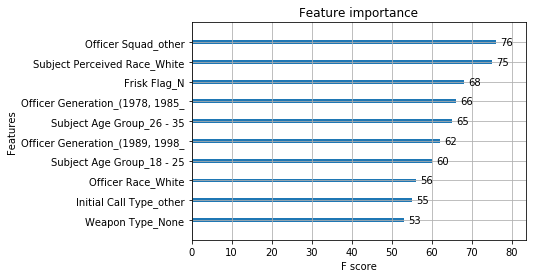

In [100]:
from xgboost import plot_importance
plt.figure(figsize=(15,15))
plot_importance(XGB,max_num_features=10)
plt.show()


In [101]:
#XGBoost doesn't have a command to get feature names. Amazing.

Top10Feats=['Officer Squad_other','Subject Perceived Race_White','Officer Generation_(1978, 1985]',
           'Subject Age Group_26 - 35','Call Type_ONVIEW','Officer Generation_(1989, 1998]','Frisk Flag_N',
            'Subject Perceived Race_Black or African American','Subject Age Group_18 - 25','Weapon Type_None']

Arrest_Rate=sum(y)/len(y)
print(Arrest_Rate*100)

X['Arrest']=y

for feat in Top10Feats:
    Series=X[X[feat]==1].Arrest
    New_Rate=sum(Series)/len(Series)
    Proportion=New_Rate/Arrest_Rate
    print(feat,round(100*Proportion,3))

32.23865546218487
Officer Squad_other 95.379
Subject Perceived Race_White 99.618
Officer Generation_(1978, 1985] 101.29
Subject Age Group_26 - 35 107.333
Call Type_ONVIEW 100.641
Officer Generation_(1989, 1998] 104.832
Frisk Flag_N 90.255
Subject Perceived Race_Black or African American 107.575
Subject Age Group_18 - 25 98.984
Weapon Type_None 102.96


The most important predictor for whether or not an arrest was made is if it was in response to a 911 class -- this makes total sense because one would expect that most people calling the police are truly endangered, as opposed to officers making routine traffic stops.

Unfortunately, subject's perceived race is an important indicator of arrest likelihood. Further analysis will follow regarding the extent. It appears that white officers born in the late 70s and early 80s (this is, the oldest and most experienced officers) are most willing to make arrests. Arrests appear to be unlikely if no weapon is found. Younger people are most likely to be arrested. Interestingly enough, subject's perceived gender is not on the list.

In [102]:
X['Arrest']=y

Black=X[X['Subject Perceived Race_Black or African American']==1]
White=X[X['Subject Perceived Race_White']==1]

print(sum(Black.Arrest)/len(Black.index))
print(sum(White.Arrest)/len(White.index))

#White people are slightly less likely to be arrested during a stop

0.3468068791762515
0.3211565585331453


In [103]:
#Lets switch around the races, keep everything else the same, and see what happens

Black['Subject Perceived Race_Black or African American']=0
Black['Subject Perceived Race_White']=1

White['Subject Perceived Race_Black or African American']=1
White['Subject Perceived Race_White']=0


C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dkond\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [104]:
Blacky=Black.Arrest
BlackX=Black.drop('Arrest',axis=1)

Whitey=White.Arrest
WhiteX=White.drop('Arrest',axis=1)

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

BlackX.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in BlackX.columns.values]
WhiteX.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in WhiteX.columns.values]


Black_pred=XGB.predict(BlackX)
print(sum(Black_pred)/len(Black_pred))

White_pred=XGB.predict(WhiteX)
print(sum(White_pred)/len(White_pred))

C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.33158067696352284
0.29633286318758817


C:\Users\dkond\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Well that is odd! All else being equal, a black person who was mistaken to be a white person was 4 points less likely to be arrested - this conforms with the understanding that black people are subject to racist treatment. 

However, a white person mistaken as being black is ALSO 3 points less likely to be arrested!

In [105]:
Women=X[X['Subject Perceived Gender_Female']==1]
Men=X[X['Subject Perceived Gender_Male']==1]
BlackWomen=Women[Women['Subject Perceived Race_Black or African American']==1]
BlackMen=Men[Men['Subject Perceived Race_Black or African American']==1]

print('Probability of Woman arrest: ',sum(Women.Arrest)/len(Women.Arrest))
print('Probability of Man arrest: ',sum(Men.Arrest)/len(Men.Arrest))
print('Probability of Black Woman arrest: ',sum(BlackWomen.Arrest)/len(BlackWomen.Arrest))
print('Probability of Black Man arrest: ',sum(BlackMen.Arrest)/len(BlackMen.Arrest))

Probability of Woman arrest:  0.295392077607114
Probability of Man arrest:  0.3310630226743685
Probability of Black Woman arrest:  0.3322942643391521
Probability of Black Man arrest:  0.3499800239712345
